In [1]:
import numpy as np
import pandas as pd

from pprint import pprint

from decision_tree_functions import decision_tree_algorithm, make_predictions, calculate_accuracy
from helper_functions import generate_data, create_plot, train_test_split

### Post Pruning

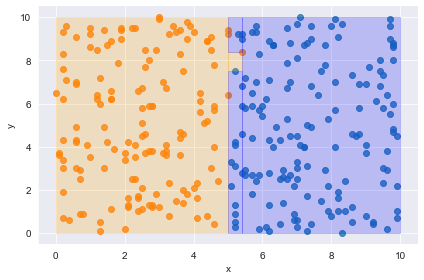

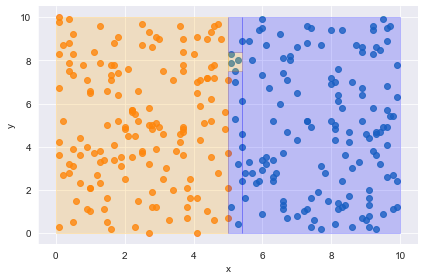

In [2]:
np.random.seed(0)
df_train = generate_data(n=300, specific_outliers=[(5.4, 8.4)])
tree = decision_tree_algorithm(df_train, ml_task="classification")
create_plot(df_train, tree)

np.random.seed(7)
df_val = generate_data(n=300)
create_plot(df_val, tree)

In [3]:
pprint(tree, width=20)

{'x <= 5.0': [True,
              {'x <= 5.4': [{'y <= 7.5': [False,
                                          {'y <= 8.4': [True,
                                                        False]}]},
                            False]}]}


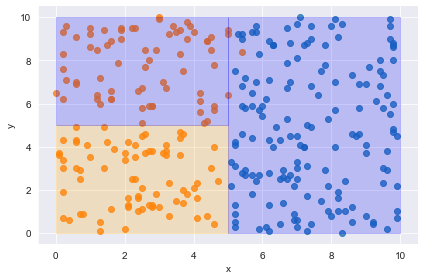

In [28]:
tree = {'x <= 5.0': [{'y <= 5': [True, False]}, False] }
create_plot(df_train, tree)

In [5]:
def filter_df(df, question):
    feature, _, value = question.split()
    df_yes = df[df[feature] <= float(value)]
    df_no = df[df[feature] > float(value)]
    
    return df_yes, df_no

In [14]:
def pruning_result(tree, df_train, df_val):
    leaf = df_train.label.value_counts().index[0]
    errors_leaf = sum(df_val.label != leaf)
    errors_decision_node = sum(df_val.label != make_predictions(df_val, tree))

    if errors_leaf <= errors_decision_node:
        return leaf
    else:
        return tree

In [30]:
def post_pruning(tree, df_train, df_val):
    question = list(tree.keys())[0]
    yes_answer, no_answer = tree[question]

    #base case
    if not isinstance(yes_answer, dict) and not isinstance(no_answer, dict):
        return pruning_result(tree, df_train, df_val)
    
    else:
        df_train_yes, df_train_no = filter_df(df_train, question)
        df_val_yes, df_val_no = filter_df(df_val, question)
        
        if isinstance(yes_answer, dict):
            yes_answer = post_pruning(yes_answer, df_train_yes, df_val_yes)
        
        if isinstance(no_answer, dict):
            no_answer = post_pruning(no_answer, df_train_no, df_val_no)
        
        tree = {question: [yes_answer, no_answer]}

    return pruning_result(tree, df_train, df_val)

In [31]:
pruned_tree = post_pruning(tree, df_train, df_val)

In [32]:
pruned_tree

{'x <= 5.0': [True, False]}

In [33]:
tree

{'x <= 5.0': [{'y <= 5': [True, False]}, False]}

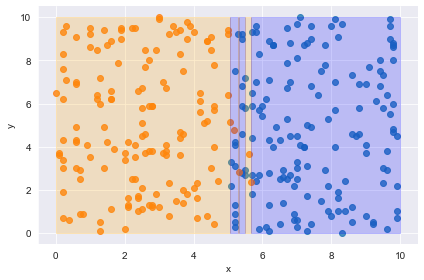

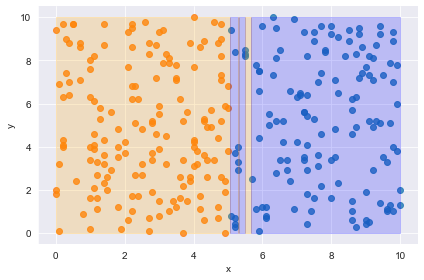

In [38]:
np.random.seed(0)
df_train = generate_data(n=300, n_random_outliers=5)#specific_outliers=[(5.4, 8.4)])
tree = decision_tree_algorithm(df_train, ml_task="classification")
create_plot(df_train, tree)

# np.random.seed(7)
df_val = generate_data(n=300)
create_plot(df_val, tree)

In [39]:
pprint(tree)

{'x <= 5.06': [True,
               {'x <= 5.68': [{'x <= 5.5': [{'x <= 5.33': [{'x <= 5.3': [False,
                                                                         True]},
                                                           False]},
                                            True]},
                              False]}]}


{'x <= 5.06': [True, False]}


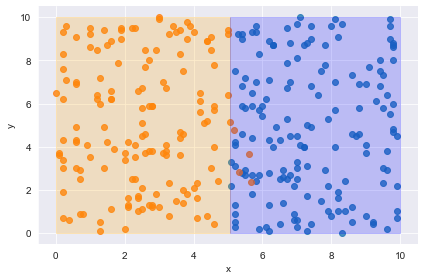

In [42]:
pruned_tree = post_pruning(tree, df_train, df_val)
pprint(pruned_tree)
create_plot(df_train, pruned_tree)